In [14]:
import pandas as pd
import numpy as np

import os

In [7]:
Housing_Data = pd.read_csv("Chapter 2 - housing.csv")
Housing_Data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
 Housing_Data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:>

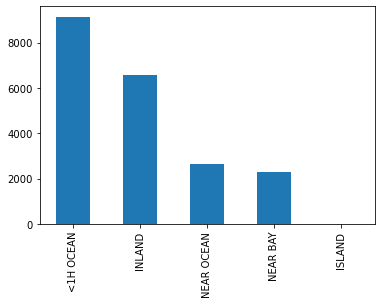

In [10]:
 Housing_Data["ocean_proximity"].value_counts().plot(kind ="bar")

<AxesSubplot:>

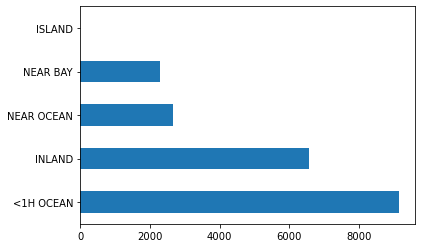

In [11]:
  Housing_Data["ocean_proximity"].value_counts().plot(kind ="barh")

In [12]:
Housing_Data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:>

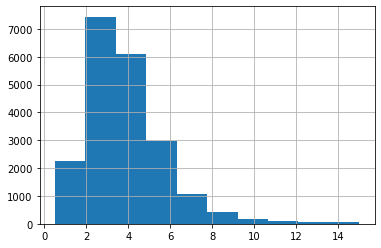

In [13]:
Housing_Data["median_income"].hist()

In [15]:
Housing_Data["income_cat"] = pd.cut(Housing_Data["median_income"], bins = [0., 1.5, 3.0, 4.5, 6.0,np.inf], labels = [1, 2, 3, 4, 5])
Housing_Data["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

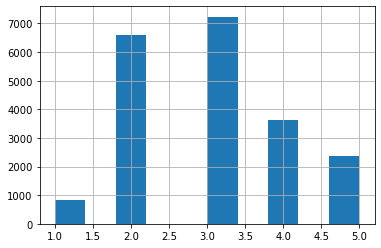

In [16]:
Housing_Data["income_cat"].hist()

### Preparing the Data

In [18]:
y = Housing_Data["median_house_value"]
x = Housing_Data.drop("median_house_value", axis = 1)
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,2


### Split Datasets

In [20]:
from sklearn.model_selection import train_test_split

#Split the dataset horizontally into a training set and a testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
7217,-118.16,34.03,45.0,894.0,231.0,925.0,222.0,2.6042,<1H OCEAN,2
4652,-118.32,34.06,36.0,3239.0,722.0,1383.0,612.0,4.5918,<1H OCEAN,4
16490,-120.97,38.00,27.0,1683.0,288.0,873.0,258.0,4.7069,INLAND,4
17222,-119.71,34.44,41.0,2220.0,367.0,927.0,355.0,5.3184,<1H OCEAN,4
2886,-118.98,35.38,28.0,1171.0,299.0,1193.0,273.0,0.8639,INLAND,1
...,...,...,...,...,...,...,...,...,...,...
4760,-118.35,34.04,36.0,1956.0,601.0,1672.0,546.0,1.8685,<1H OCEAN,2
7921,-118.08,33.86,26.0,778.0,173.0,539.0,186.0,3.2679,<1H OCEAN,3
3254,-120.14,36.00,33.0,1726.0,420.0,1371.0,388.0,2.0335,INLAND,2
7430,-118.21,33.95,35.0,2129.0,614.0,2376.0,618.0,2.0372,<1H OCEAN,2


<AxesSubplot:>

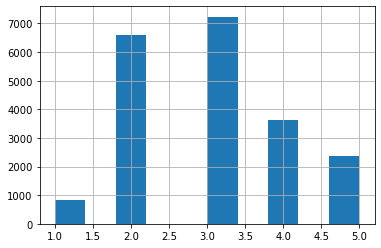

In [21]:
Housing_Data["income_cat"].hist()

<AxesSubplot:>

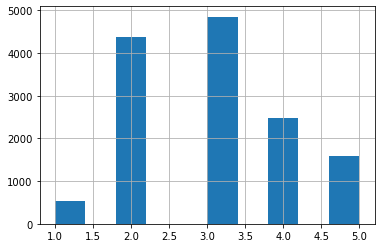

In [22]:
#spilted data distripution is equavilent to the dataset
x_train["income_cat"].hist()

In [31]:
#Incase that the splited data is not equavily distriputed you can use statified split

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size= 0.2, random_state= 42)

#Split the data using the "income_cat" column 
#to make sure that approximate percent of each income_cat are evenly distributed

for train_index, test_index in split.split(Housing_Data,Housing_Data["income_cat"]):
    start_train_set = Housing_Data.loc[train_index]
    start_test_set = Housing_Data.loc[test_index]

start_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,4
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,2
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,3
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,3


In [28]:
Housing_Data["income_cat"].value_counts()/len(Housing_Data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [32]:
start_train_set["income_cat"].value_counts()/len(start_test_set)

3    1.402374
2    1.275436
4    0.705184
5    0.457607
1    0.159399
Name: income_cat, dtype: float64

In [33]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set1, test_set1 = train_test_split(Housing_Data, test_size = 0.2, random_state = 42)
compare_props = pd.DataFrame({
    "Overall" : income_cat_proportions(Housing_Data),
    "Stratified" :income_cat_proportions(start_test_set),
    "Random" : income_cat_proportions(test_set1)
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011
